# Model Refinement and Evaluation

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Import Data**

You can find the "Automobile Dataset" from the following link: <br>
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.

Here we are using the data we prepared on our previous chapter.
https://github.com/ElsonFilho/Python_DataAnalysis/blob/main/notebooks/02_Data_Wrangling.ipynb


In [2]:
# Path to the CSV file
path = "/content/sample_data/clean_df.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(path)
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,False,True,True,False


In [4]:
# Let's only use numeric data

df=df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,27,13495.0,11.190476,8.703704,False,True,True,False
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,27,16500.0,11.190476,8.703704,False,True,True,False
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,...,5000.0,19,26,16500.0,12.368421,9.038462,False,True,True,False
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,5500.0,24,30,13950.0,9.791667,7.833333,False,True,True,False
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,...,5500.0,18,22,17450.0,13.055556,10.681818,False,True,True,False


In [5]:
# Import the Libraries for plotting

%pip install micropip
import micropip
await micropip.install(['ipywidgets'], keep_going=True)
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [6]:
# Functions for Ploting

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()


def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 8
    plt.figure(figsize=(width, height))


    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Training and Testing

Split the data into training and testing data.

We will place the target data **price** in a separate dataframe **y_data**.

In [7]:
y_data = df['price']

x_data=df.drop('price',axis=1)

In [8]:
# Randomly split the data into training and testing, using the function train_test_split.
# The testing set is 10% of the total dataset.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [9]:
# Import LinearRegression from the module linear_model.

from sklearn.linear_model import LinearRegression

In [10]:
# Create a Linear Regression object

lre=LinearRegression()

In [11]:
# Fit the model using the feature "horsepower"

lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [12]:
# Calculate R^2

lre.score(x_test[['horsepower']], y_test)

0.3635480624962413

## Cross-Validation Score

In [13]:
# Import cross_val_score from the module model_selection.

from sklearn.model_selection import cross_val_score

In [14]:
# The parameter 'cv' determines the number of folds. In this case, it is 4.

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
print(Rcross)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

[0.77465419 0.51718424 0.74814454 0.04825398]
The mean of the folds are 0.5220592359225414 and the standard deviation is 0.29130480666118436


We can also use the function 'cross_val_predict' to predict the output.

The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training.

In [15]:
from sklearn.model_selection import cross_val_predict

In [16]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

## Overfitting, Underfitting and Model Selection
The test data, a.k.a. "out of sample data", is a much better measure of how well your model performs in the real world. One reason for this is overfitting.

Let's go over some examples.These differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

In [17]:
# Create Multiple Linear Regression objects and train the model
# using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'.

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [18]:
# Prediction using training data.

yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.34910902, 28324.42490838, 14212.74872339,  4052.80810192,
       34499.8541269 ])

In [19]:
# Prediction using test data.

yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.68099115,  5884.25292475, 11208.31007475,  6641.03017109,
       15565.98722248])

## Evaluation

Let's perform some model evaluation using our training and testing data separately.

In [20]:
# Import the seaborn and matplotlib library for plotting

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

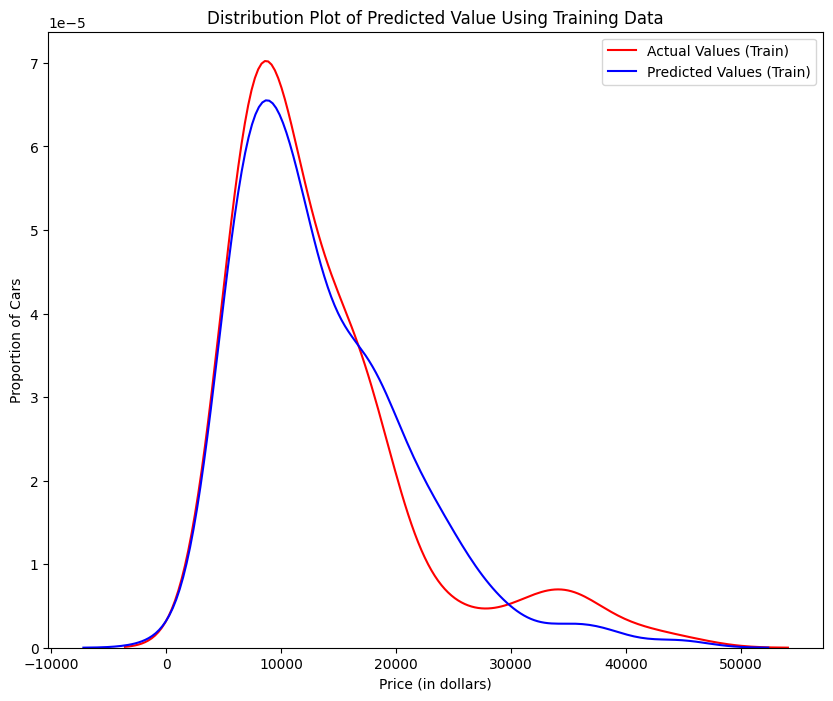

In [21]:
# Examine the distribution of the predicted values of the training data.

Title = 'Distribution Plot of Predicted Value Using Training Data'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

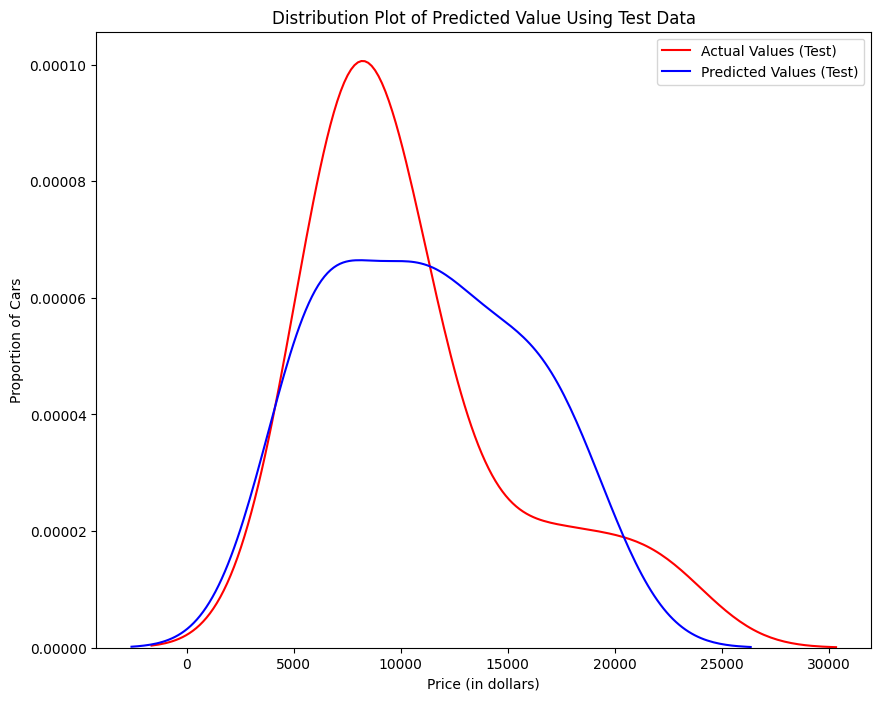

In [22]:
# Examine the distribution of the predicted values of the test data.

Title='Distribution Plot of Predicted Value Using Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

<p>Comparing the charts, it is evident that the distribution of the test data is much better at fitting the data. This difference is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>

## Overfitting
<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>

In [23]:
from sklearn.preprocessing import PolynomialFeatures

# use 55 percent of the data for training and the rest for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])

# Create a Linear Regression model "poly" and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

# Get zhe output of the model using the method "predict."
# Assign the values to "yhat".
yhat = poly.predict(x_test_pr)
yhat[0:5]

print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6727.58219945  7306.70943225 12213.70783901 18895.03307984]
True values: [ 6295. 10698. 13860. 13499.]


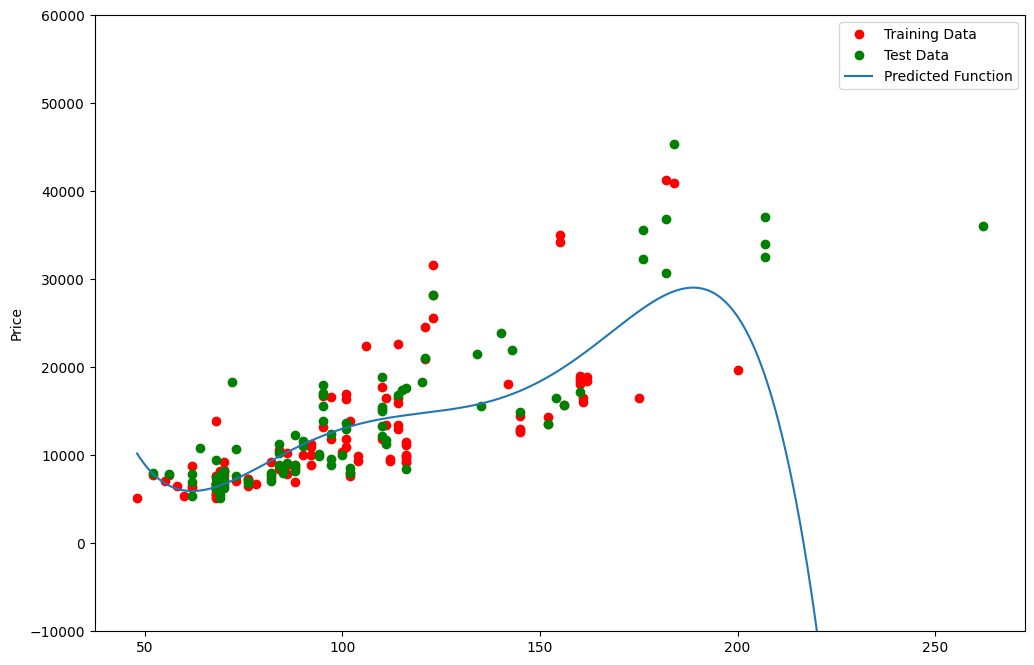

In [24]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [25]:
print("R^2 of the training data: ", poly.score(x_train_pr, y_train) )
print("R^2 of the test     data: ", poly.score(x_test_pr, y_test) )


R^2 of the training data:  0.5568527853920284
R^2 of the test     data:  -29.815556299616322


The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results

Text(3, 0.75, 'Maximum R^2 ')

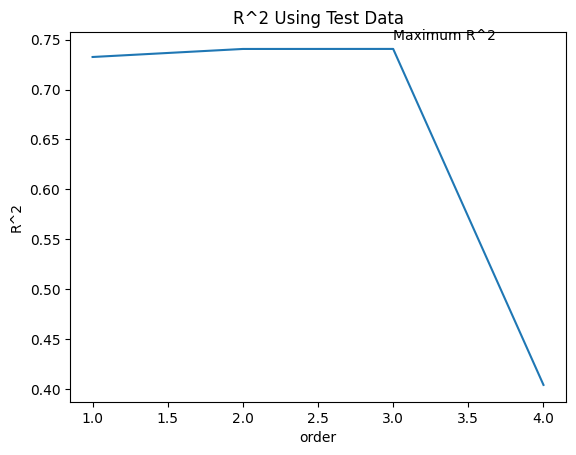

In [26]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train[['horsepower']])

    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr.fit(x_train_pr, y_train)

    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

The R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

Let's experiment with different polynomial orders and different amounts of data.

In [27]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [28]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [29]:
# Perform polynomial transformations with more than one feature.
# Create a "PolynomialFeatures" object "pr1" of degree two.

pr1=PolynomialFeatures(degree=2)

In [30]:
# Transform the training and testing samples for the features:
# 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'.

x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

print("Transformed training data shape:", x_train_pr1.shape)

Transformed training data shape: (110, 15)


In [31]:
# Create a model and train it on the transformed training data

poly1=LinearRegression().fit(x_train_pr1,y_train)

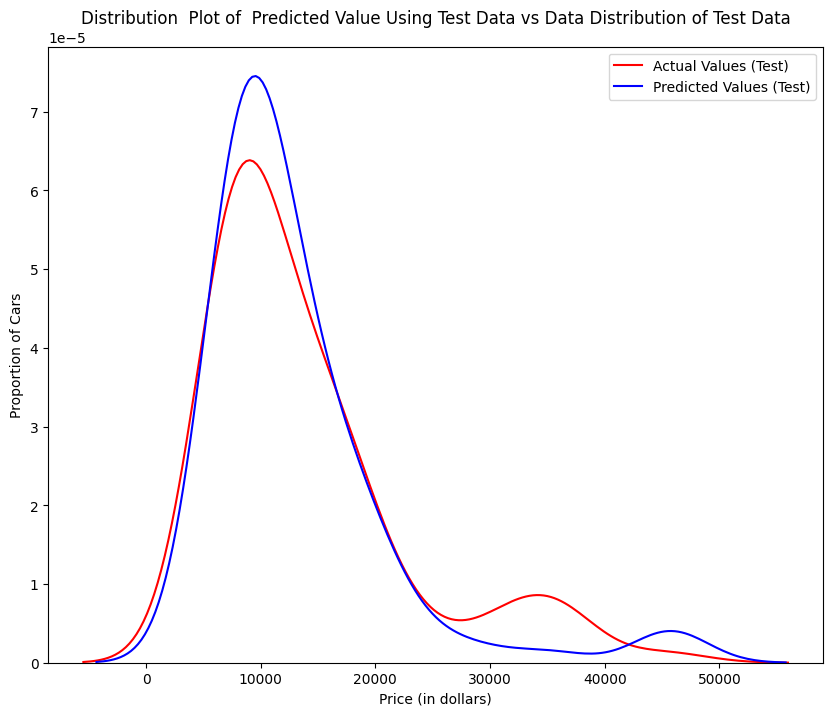

In [32]:
# Predict an output on the polynomial features.
# Use the function "DistributionPlot" to display the distribution
# of the predicted test output vs. the actual test data.

yhat_test1 = poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

The predicted value is higher than actual value for cars around the 10,000 price range. And the predicted price is lower than the price in the 30,000 to 40,000 range.

As such the model is not as accurate in these ranges.

## Ridge Regression

In [34]:
# Let's perform a degree two polynomial transformation on our data.

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [33]:
# Import Ridge from the module linear models.

from sklearn.linear_model import Ridge

In [38]:
# Create a Ridge regression object, setting the regularization (alpha) to 0.1

RigeModel=Ridge(alpha=1)

# Train
RigeModel.fit(x_train_pr, y_train)

# Get the prediction
yhat = RigeModel.predict(x_test_pr)

In [39]:
# Compare the first five predicted samples to our test set.

print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6572.19586866  9634.40697746 20948.17104272 19403.38016094]
test set : [ 6295. 10698. 13860. 13499.]


In [40]:
# We can use a for loop to select the  alpha that minimizes the test error.

from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:09<00:00, 101.53it/s, Test Score=0.564, Train Score=0.859]


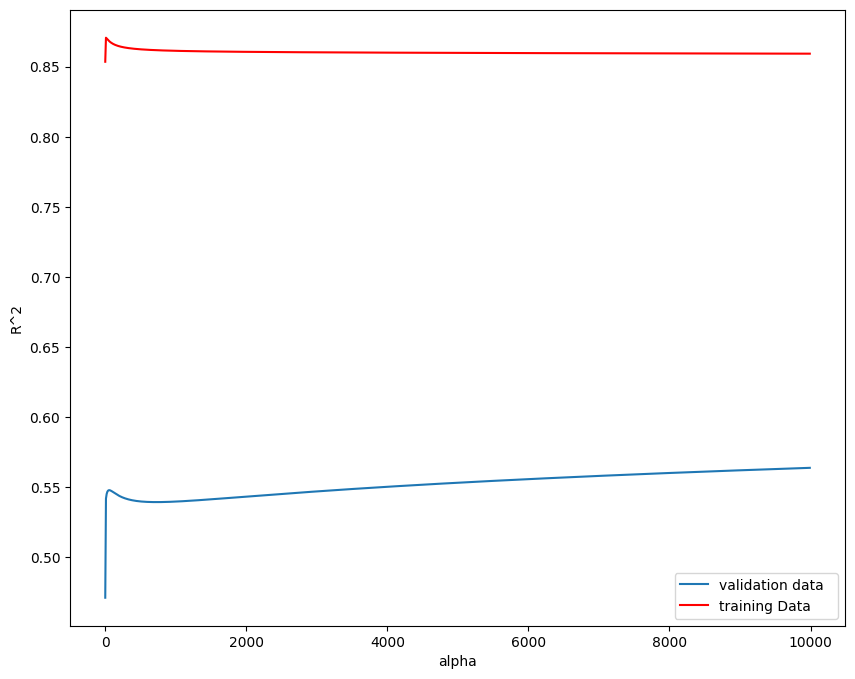

In [42]:
# Plot out the value of R^2 for different alphas.

width = 10
height = 8
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Here the model is built and tested on the same data, so the training and test data are the same.

The red line represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data.

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

## Grid Search

The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [50]:
# Create a Ridge regression object

RR=Ridge()

In [54]:
# Create a ridge grid search object

Grid1 = GridSearchCV(RR, parameters1,cv=4)


# Fit the model

Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [55]:
# The object finds the best parameter values on the validation data.
# We can obtain the estimator with the best parameters.

BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [65]:
# Print the R^2 for the test data using the estimator derived optimum alpha.

y_pred_test = BestRR.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

# Calculate the R^2 score on the test data
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_pred_test)

# Print the R^2 score
print(f"R^2 on the test data: {r2_test}")


R^2 on the test data: 0.8411781387793232
